#Combining Next-Item Relevance with Psychology-Based Interest in Music Recommender Systems

Author: Laura Legat

Matriculation ID: 51868012

In [ ]:
# import access to Google Drive files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import needed libraries

import os
import torch
import sys
import pandas as pd
import importlib

!pip install optuna
import optuna
import pickle
import matplotlib.pyplot as plt
import json
import numpy as np
from ast import literal_eval
from collections import OrderedDict
import warnings
import seaborn as sns
import h5py

!pip install tensorboardX

print('\nAll imports successful!')

In [ ]:
# Check if gpu is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_name = torch.cuda.get_device_name(device)
    print(f'Using GPU: {device_name}')
else:
    device = torch.device('cpu')
    print('Using CPU')

print(f'Current device: {device}')

Using GPU: Tesla T4
Current device: cuda


# Data preparation and preprocessing

In [ ]:
# create train-val-test sets for Ex2Vec training, as well as sequences for GRU4Rec training
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/preprocess.py -sl 50 -st 1 -p /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/ -sm Y -u 1000

In [ ]:
%cd /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI

In [ ]:
!python setup.py install

In [ ]:
from GRU4Rec_Fork.gru4rec_utils import convert_to_param_str, rerank, combine_scores
from ex2vec import Ex2VecEngine

The size of the training set is: 1106989
The size of the validation set is: 156748
The size of the test set is: 320078
The size of the combined (train+val) set is: 1263737


# Training baseline Ex2Vec

In [ ]:
# train standard ex2vec baseline (no GRU4rec item embeddings, no hyperparameter tuning)
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/train.py -n ex2vec_baseline -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --use_cuda

In [ ]:
# hyperparameter tuning standard ex2vec
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optuna_paropt.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/processed.csv -opf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/paramspaces/deezer_parspace_Ex2Vec.json -nt 2 -mo ex2vec -o /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_ex2vec.json -ovc /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_ex2vec_TEST.csv -ovp /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec_TEST.pkl -sp "sqlite:////content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec_TEST.db" -sn "ex2vec_study1_TEST" -a "ex2vec_baseline_tuning" -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --use_cuda

In [ ]:
# re-train ex2vec with best parameters (no GRU4Rec item embeddings)
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/train.py -pf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_ex2vec.json -t N -n ex2vec_baseline_finaltrain_U1000 -ud 1 -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --use_cuda

In [ ]:
# unzip compressed study db file while keeping gz intact
!gunzip -k /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec.db.gz

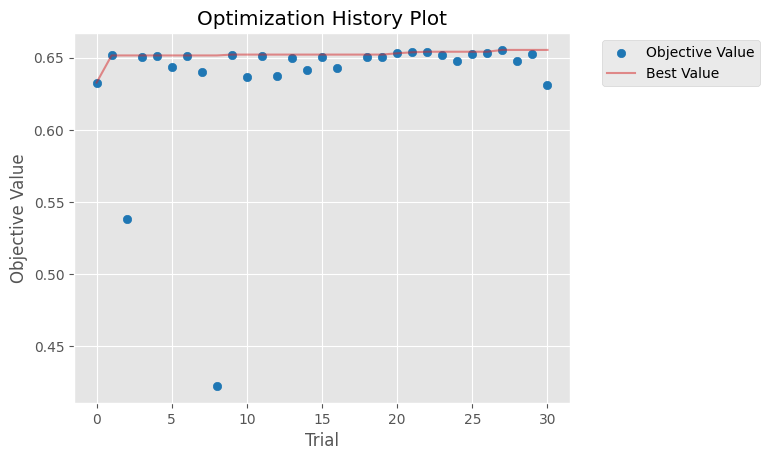

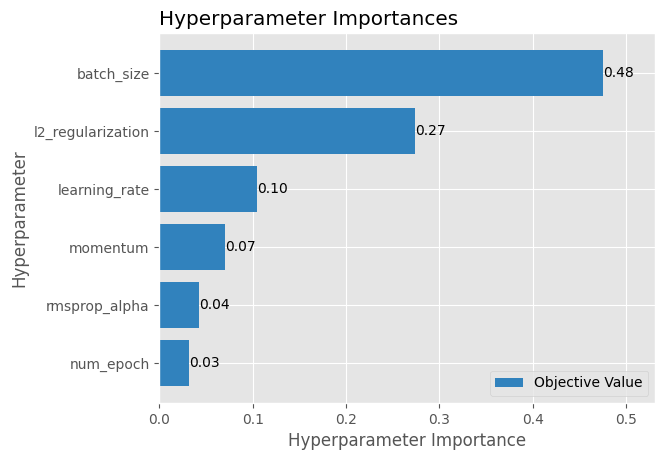

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_l2_regularization,params_learning_rate,params_momentum,params_num_epoch,params_rmsprop_alpha,state,acc,recall,f1,bacc,search_space_id
0,0,0,0.632695,2024-10-08 11:44:24.271068,2024-10-08 12:13:20.986117,0 days 00:28:56.715049,256,0.000035,0.000011,0.70,100,0.8,COMPLETE,0.636142,0.724547,0.632695,0.631370,1.0
1,1,1,0.651501,2024-10-08 12:16:25.847195,2024-10-08 12:22:30.021673,0 days 00:06:04.174478,1024,0.001322,0.000362,0.25,30,0.3,COMPLETE,0.653393,0.719947,0.651501,0.649800,2.0
2,2,2,0.538302,2024-10-08 12:23:47.515041,2024-10-08 12:29:56.635392,0 days 00:06:09.120351,2048,0.000144,0.000018,0.80,30,0.8,COMPLETE,0.542112,0.629594,0.538302,0.537390,3.0
3,3,3,0.650537,2024-10-08 12:30:08.837099,2024-10-08 12:39:15.937278,0 days 00:09:07.100179,256,0.000049,0.000073,0.65,30,0.8,COMPLETE,0.655128,0.758897,0.650537,0.649526,4.0
4,4,4,0.651463,2024-10-08 12:39:31.184140,2024-10-08 12:50:46.434449,0 days 00:11:15.250309,512,0.004423,0.000066,0.80,50,0.7,COMPLETE,0.651976,0.688413,0.651463,0.650010,5.0
5,5,5,0.643388,2024-10-08 12:54:48.412490,2024-10-08 13:04:29.188554,0 days 00:09:40.776064,2048,0.000162,0.000187,0.90,50,0.3,COMPLETE,0.651708,0.790989,0.643388,0.644190,6.0
6,6,6,0.651200,2024-10-08 13:05:46.145924,2024-10-08 13:34:49.026447,0 days 00:29:02.880523,256,0.000184,0.000017,0.70,100,0.8,COMPLETE,0.656359,0.766544,0.651200,0.650411,7.0
7,7,7,0.639822,2024-10-08 13:34:59.986033,2024-10-08 13:49:36.157838,0 days 00:14:36.171805,256,0.000650,0.000018,0.35,50,0.8,COMPLETE,0.648168,0.787129,0.639822,0.640667,8.0
8,8,8,0.422584,2024-10-08 13:50:06.294424,2024-10-08 14:08:56.832614,0 days 00:18:50.538190,2048,0.009214,0.000044,0.00,100,0.5,COMPLETE,0.539197,0.960310,0.422584,0.516465,9.0
9,9,9,0.652094,2024-10-08 14:11:09.459128,2024-10-08 14:33:11.049999,0 days 00:22:01.590871,512,0.003444,0.000020,0.50,100,0.5,COMPLETE,0.652908,0.697432,0.652094,0.650504,10.0


In [ ]:
warnings.filterwarnings('ignore')
# visualize optuna results for ex2vec
# Load study from pickle file
with open('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec.pkl', 'rb') as f:
    study = pickle.load(f)

# Load trials data from CSV
trials_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_ex2vec.csv')

# Optuna visualizations
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

# Display the trials DataFrame
display(trials_df)


# Training GRU4Rec

In [ ]:
# initial training + hyperparameter optimization with seq_train.csv and seq_val.csv on GRU4Rec
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optuna_paropt.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_train.csv -opf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/paramspaces/deezer_parspace_GRU4Rec.json -nt 2 -o /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_gru4rec.json -mo gru4rec -t /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_val.csv -m "1 5 10 20" -ik "itemId" -tk "timestamp" -ovc /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_gru4rec_DELLL.csv -ovp /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec_DELLL.pkl -s "/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_hyperparam_DELLL_{}.pt" -sp "sqlite:////content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec_DELLL.db" -sn "gru4rec_study1_DELLL" -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --optim

In [ ]:
# retrain gru4rec with best params
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/run.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_combined.csv -pf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_gru4rec.json -t /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_test.csv -s /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_finaltrain_bestparams_U1000.pt -m 1 5 10 20 -ik "itemId" -tk "timestamp" -pm recall -lpm -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/

In [ ]:
# unzip compressed study db file while keeping gz intact
!gunzip -k /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec.db.gz

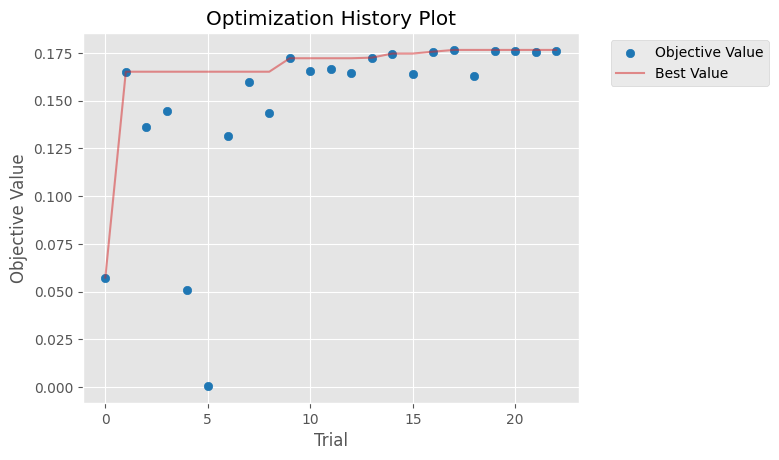

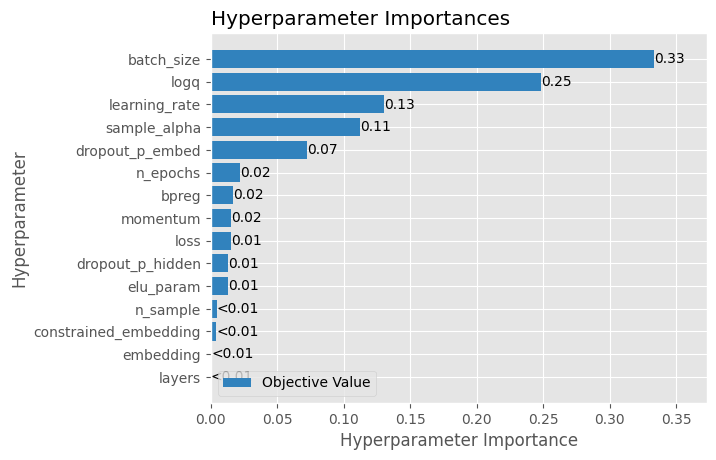

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_bpreg,params_constrained_embedding,params_dropout_p_embed,...,state,Recall@1,Recall@5,Recall@10,Recall@20,MRR@1,MRR@5,MRR@10,MRR@20,search_space_id
0,0,0,0.057347,2024-10-10 12:23:49.637151,2024-10-10 15:32:17.366146,0 days 03:08:27.728995,256,0.0,False,0.20,...,COMPLETE,0.057347,0.221749,0.359141,0.522107,0.057347,0.111248,0.129393,0.140604,1.0
1,1,1,0.165202,2024-10-10 16:07:07.849502,2024-10-10 20:28:46.098787,0 days 04:21:38.249285,320,1.0,False,0.50,...,COMPLETE,0.165202,0.392929,0.551301,0.704189,0.165202,0.244575,0.265567,0.276230,2.0
2,2,2,0.136413,2024-10-11 20:59:28.637171,2024-10-12 00:07:17.967556,0 days 03:07:49.330385,256,0.0,True,0.00,...,COMPLETE,0.136413,0.371866,0.525892,0.661354,0.136413,0.219931,0.240353,0.249820,3.0
3,3,3,0.144690,2024-10-12 00:54:06.215319,2024-10-12 05:24:22.372529,0 days 04:30:16.157210,240,0.5,False,0.30,...,COMPLETE,0.144690,0.372141,0.517740,0.639006,0.144690,0.225788,0.245092,0.253558,4.0
4,4,4,0.051011,2024-10-12 13:39:51.191912,2024-10-12 16:44:04.617770,0 days 03:04:13.425858,272,1.0,True,0.50,...,COMPLETE,0.051011,0.223126,0.377075,0.576168,0.051011,0.107930,0.128213,0.142060,5.0
5,5,5,0.000595,2024-10-12 17:22:39.486298,2024-10-12 22:07:21.958160,0 days 04:44:42.471862,144,1.0,False,0.35,...,COMPLETE,0.000595,0.002960,0.008715,0.020225,0.000595,0.001253,0.002017,0.002743,6.0
6,6,6,0.131407,2024-10-12 22:16:26.932267,2024-10-13 01:15:52.559408,0 days 02:59:25.627141,384,1.0,True,0.10,...,COMPLETE,0.131407,0.369538,0.532192,0.675675,0.131407,0.216115,0.237612,0.247642,7.0
7,7,7,0.159786,2024-10-13 02:24:00.527751,2024-10-13 06:40:40.729993,0 days 04:16:40.202242,496,1.0,True,0.00,...,COMPLETE,0.159786,0.378816,0.529875,0.668500,0.159786,0.237207,0.257202,0.266904,8.0
8,8,8,0.143780,2024-10-13 13:29:15.861663,2024-10-13 16:40:15.515276,0 days 03:10:59.653613,192,0.0,True,0.10,...,COMPLETE,0.143780,0.380371,0.542644,0.695798,0.143780,0.228390,0.249884,0.260587,9.0
9,9,9,0.172258,2024-10-13 16:58:04.741696,2024-10-13 21:18:43.501714,0 days 04:20:38.760018,336,0.5,False,0.30,...,COMPLETE,0.172258,0.401978,0.551264,0.692913,0.172258,0.252975,0.272786,0.282686,10.0


In [ ]:
warnings.filterwarnings('ignore')
# visualize optuna results for gru4rec
# Load study from pickle file
with open('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec.pkl', 'rb') as f:
    study = pickle.load(f)

# Load trials data from CSV
trials_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_gru4rec.csv')

# Optuna visualizations
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

# Display the trials DataFrame
display(trials_df)

# Combination Idea 1: Re-ranking GRU4Rec's next-item predictions by combining relevance scores with Ex2Vec interest scores

In [ ]:
# functionality for scoring the stores as a .h5 database file
!python comb1.py -bp ./optim/best_params_ex2vec.json -ex ./models/ex2vec_baseline_FULL_finaltrain__BS512LR0.00014455048679195258L_DIM64N_EP50_Epoch49_f10.6326.pt -gru ./models/GRU4Rec_FULL_finaltrain_bestparams_trial19.pt -sp ./results -pth ./ -mp ./results/score_combination.csv -k 100 -bs 4096 --store-only

In [ ]:
# perform various benchmarking on the stored scores
!python comb1.py -bp ./optim/best_params_ex2vec.json -ex ./models/ex2vec_baseline_FULL_finaltrain__BS512LR0.00014455048679195258L_DIM64N_EP50_Epoch49_f10.6326.pt -gru ./models/GRU4Rec_FULL_finaltrain_bestparams_trial19.pt -sp ./results/model_scores.h5 -pth ./ -mp ./results/score_combination.csv -a 0.03 0.05 0.1 -m 1 5 10 20

### Performance Comparison - Without Thresholding

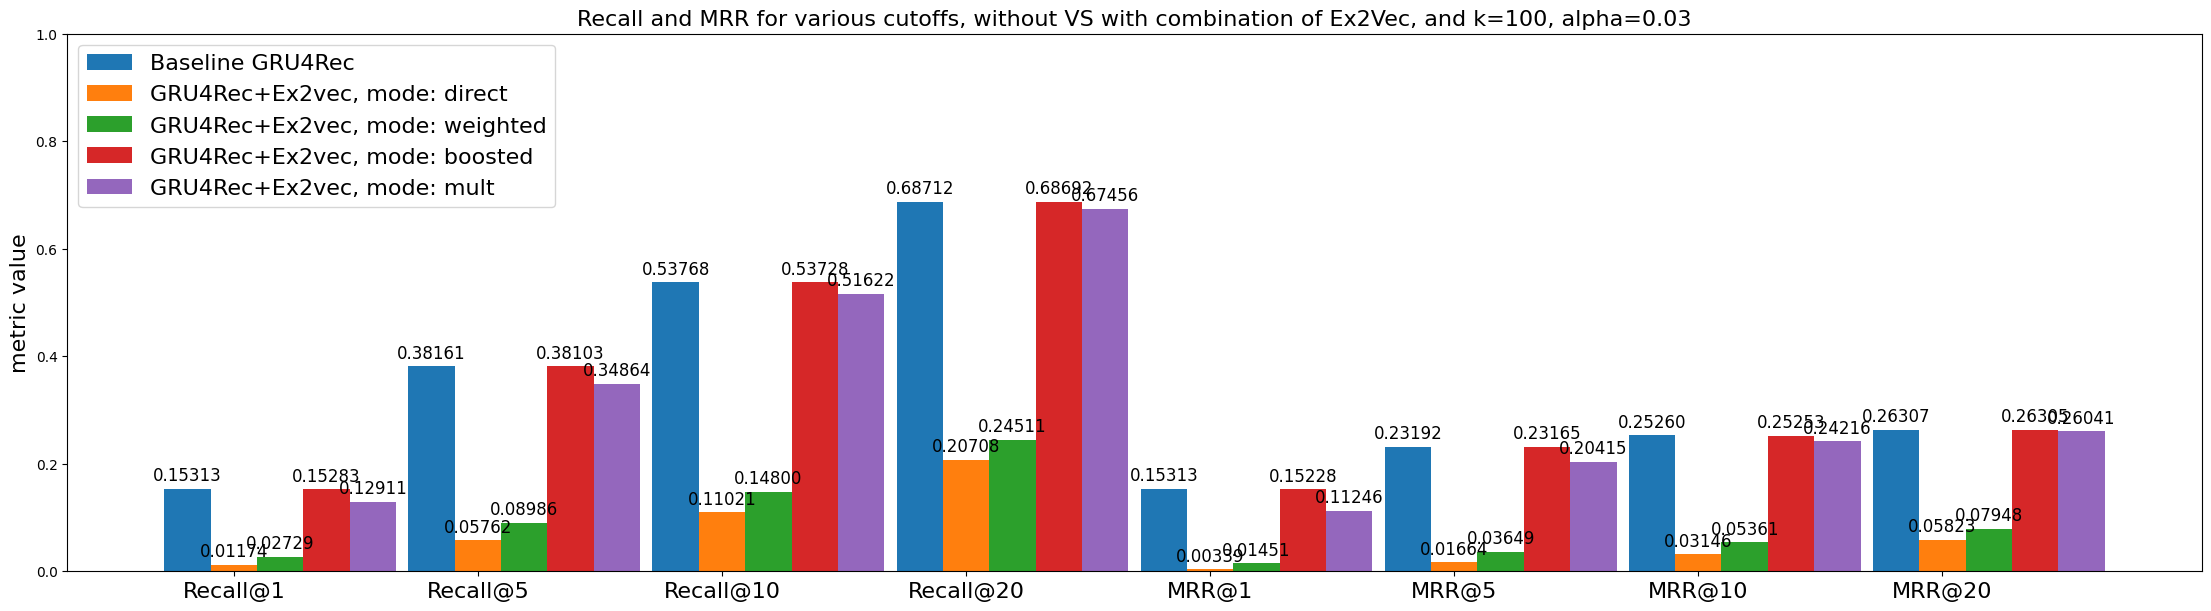

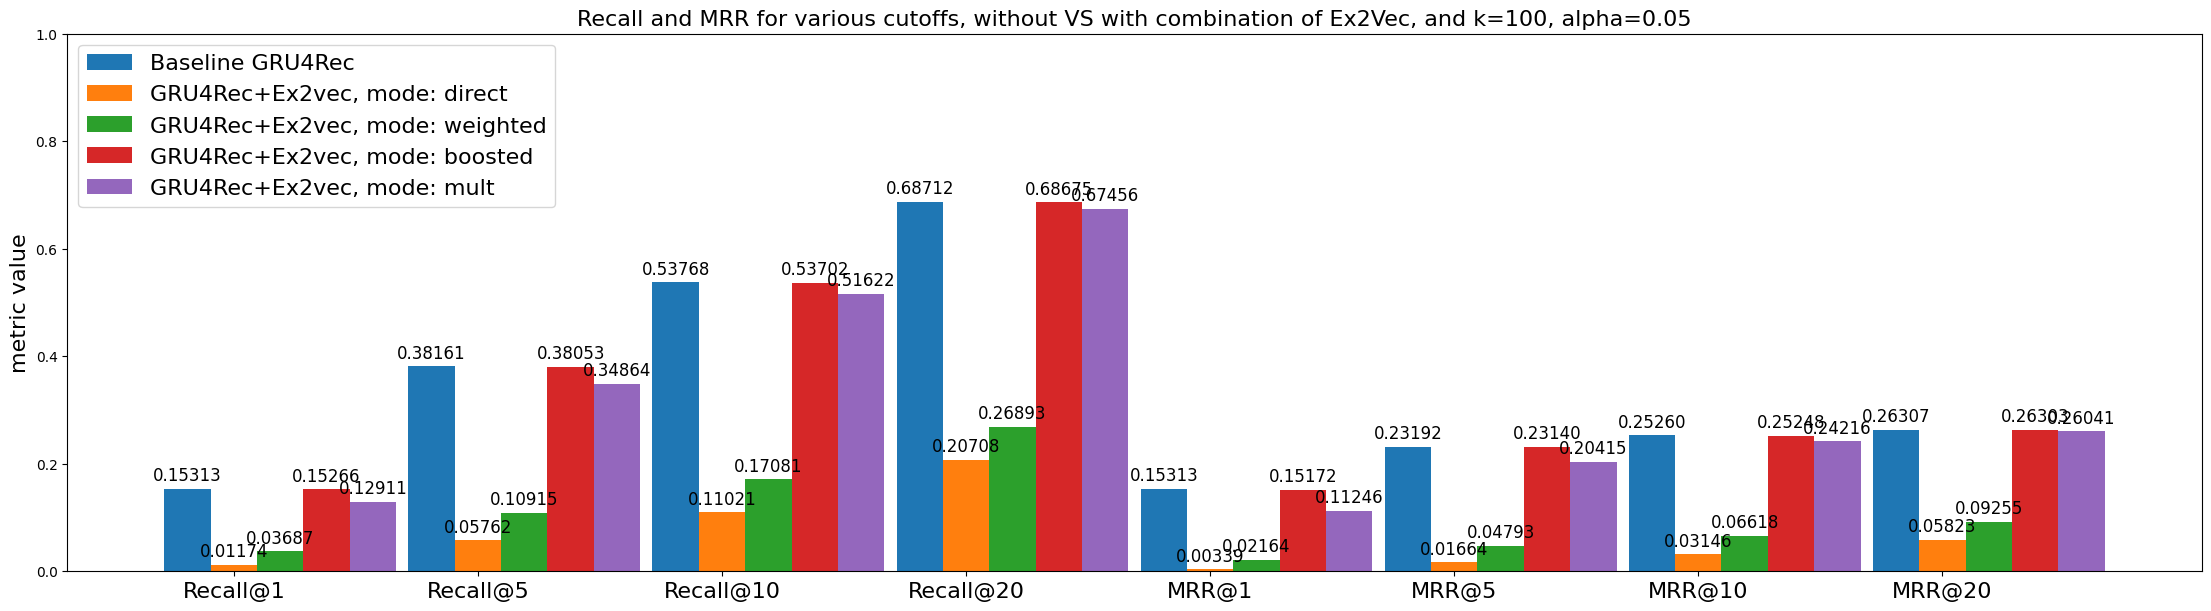

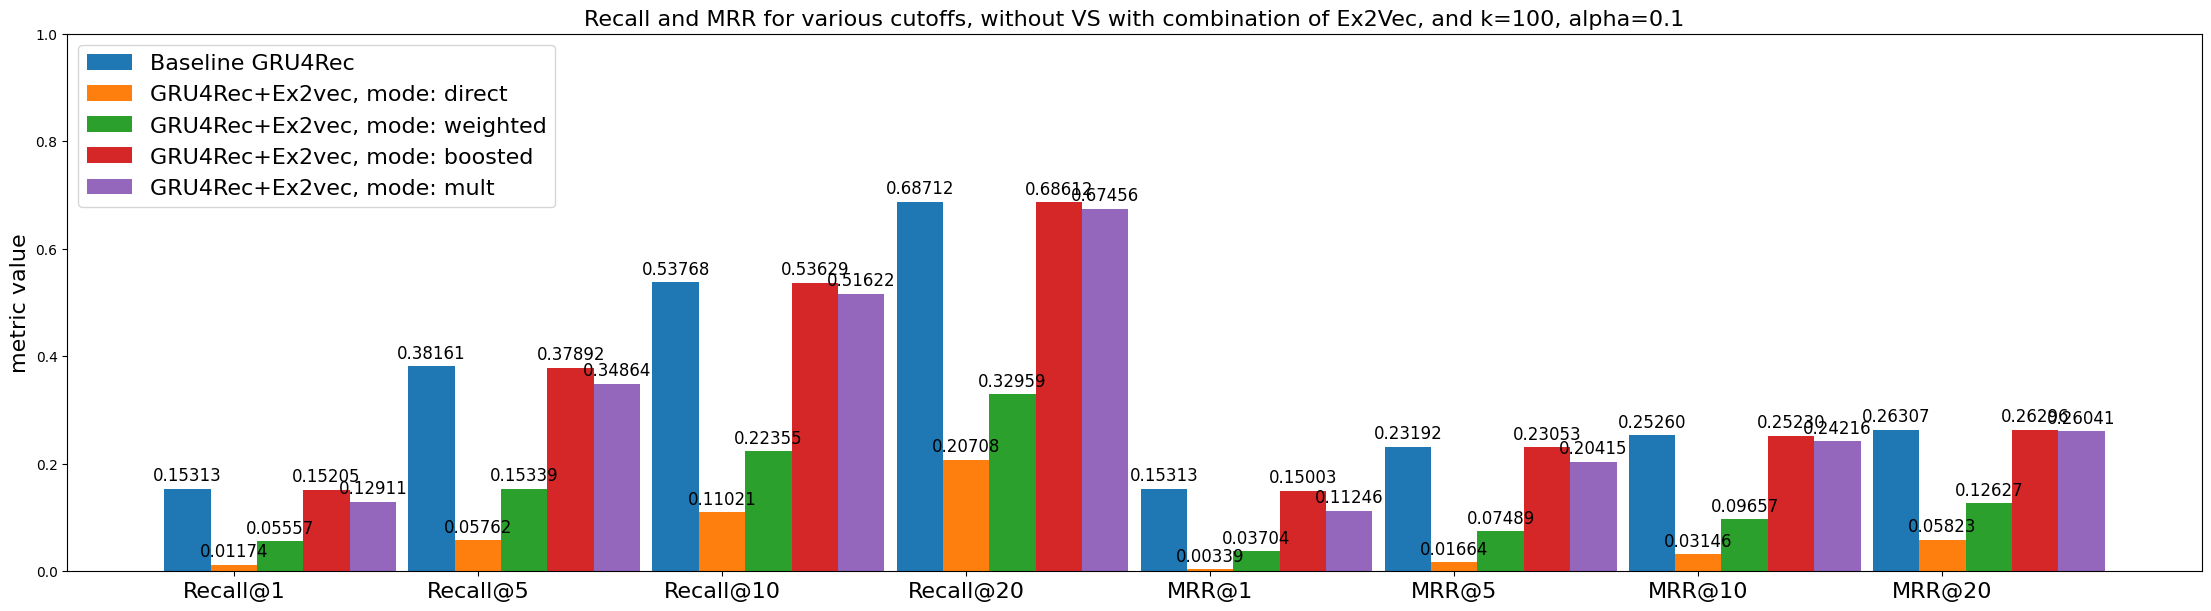

In [ ]:
cutoff = [1,5,10,20]
alpha_list = [0.03, 0.05, 0.1]
topk=100
# for each alpha, print the performance bar plots
for alpha in alpha_list:
    score_comb_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/score_combination.csv')

    # x axis values
    gru4rec_combi_metrics = tuple([f"Recall@{c}" for c in cutoff] + [f"MRR@{c}" for c in cutoff])
    x = np.arange(len(gru4rec_combi_metrics))

    # filter out rows of specific alpha
    gru4rec_rows = score_comb_df[score_comb_df['alpha'] == alpha]

    metrics_dict = {}
    for recalls, mrrs, baseline_recalls, baseline_mrrs, combination_mode in zip(gru4rec_rows['recalls_comb'], gru4rec_rows['mrrs_comb'], gru4rec_rows['baseline_recalls'], gru4rec_rows['baseline_mrrs'], gru4rec_rows['combination_mode']):
        # split out values, e.g. Recall@1=0.2433,Recall@5=0.453,MRR@1=0.123,MRR@5=0.431
        baseline_recall_vals = [float(recall.split('=')[1]) for recall in baseline_recalls.split(',')]
        baseline_mrr_vals = [float(mrr.split('=')[1]) for mrr in baseline_mrrs.split(',')]
        metrics_before = baseline_recall_vals + baseline_mrr_vals

        recall_vals = [float(recall.split('=')[1]) for recall in recalls.split(',')]
        mrr_vals = [float(mrr.split('=')[1]) for mrr in mrrs.split(',')]
        metrics_after = recall_vals + mrr_vals

        # add all before and after metrics to dict as tuples
        metrics_dict["Baseline GRU4Rec"] = tuple(metrics_before)
        metrics_dict[f"GRU4Rec+Ex2vec, mode: {combination_mode}"] = tuple(metrics_after)

    width = 0.19
    multiplier = 0
    fig, ax = plt.subplots(figsize=(22,6), layout='constrained')

    for k,v in metrics_dict.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, v, width, label=k)
        ax.bar_label(rects, labels=[f"{va:.5f}" for va in v], padding=3, fontsize=12)
        multiplier += 1

    ax.set_ylabel('metric value', fontsize=16)
    ax.set_title(f'Recall and MRR for various cutoffs, without VS with combination of Ex2Vec, and k={topk}, alpha={alpha}', fontsize=16)
    ax.set_xticks(x + width, gru4rec_combi_metrics, fontsize=16)
    ax.legend(loc='upper left', ncols=1, fontsize=16)
    ax.set_ylim(0, 1)

    plt.show()

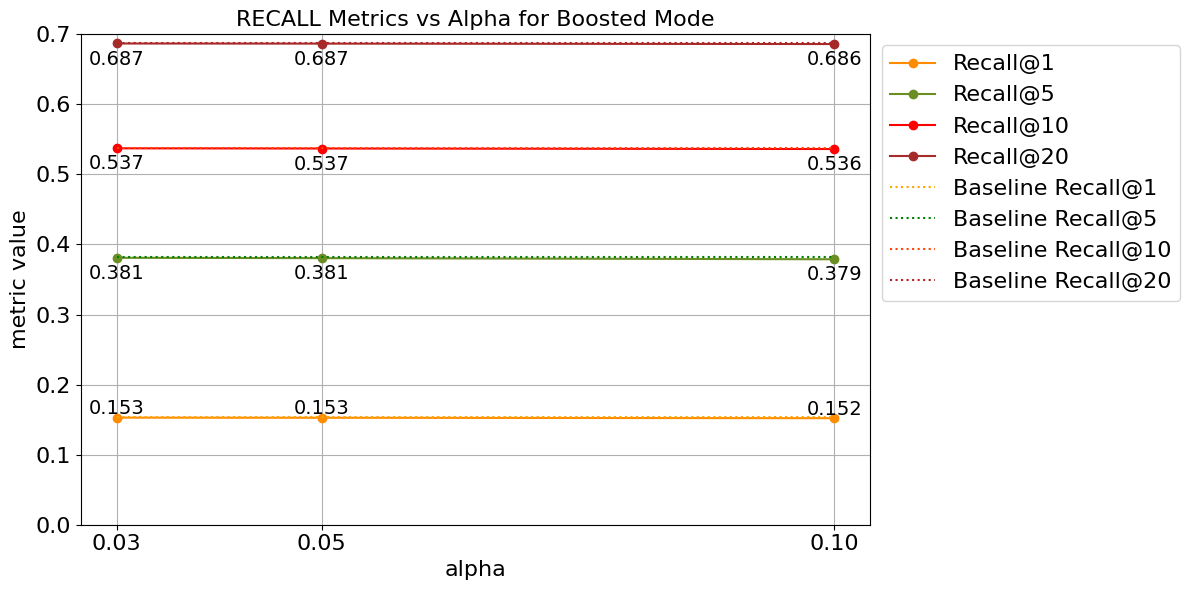

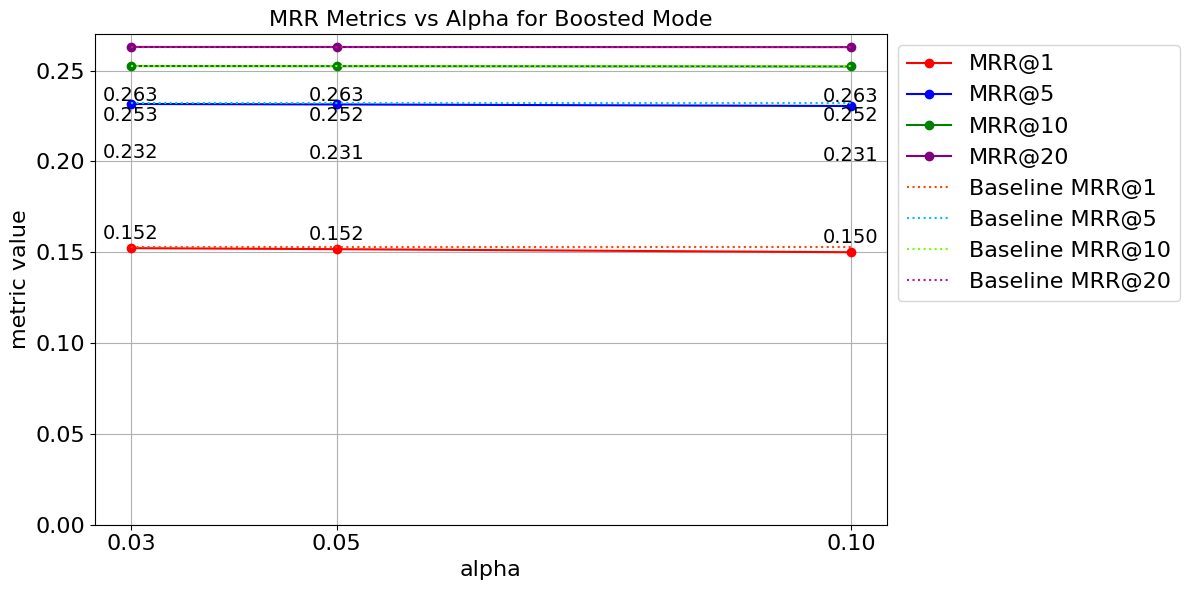

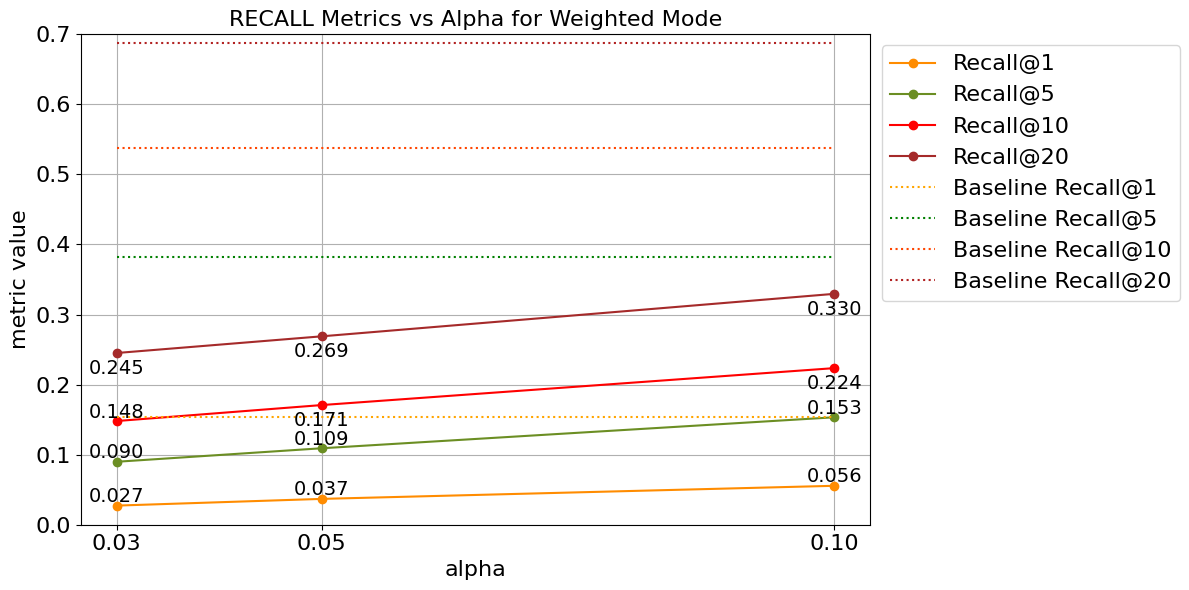

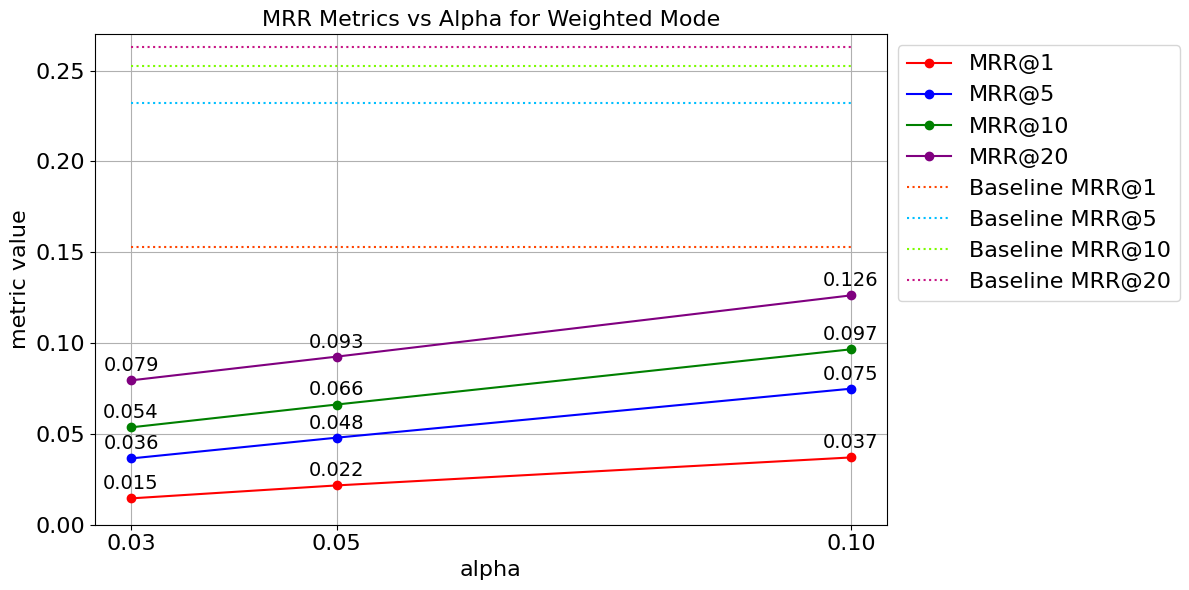

In [ ]:
score_comb_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/score_combination.csv')

cutoff = [1, 5, 10, 20]
recall_metrics = [f"Recall@{c}" for c in cutoff]
mrr_metrics = [f"MRR@{c}" for c in cutoff]
alpha_list = sorted(score_comb_df['alpha'].unique())

# filter data for "boosted" and "weighted" methods
filtered_df = score_comb_df[score_comb_df['combination_mode'].isin(['boosted', 'weighted'])]

# initialize a dictionary to store metric values for each mode
metrics_by_alpha = {
    mode: {
        'recall': {metric: [] for metric in recall_metrics},
        'mrr': {metric: [] for metric in mrr_metrics},
        'baseline_recall': {metric: [] for metric in recall_metrics},
        'baseline_mrr': {metric: [] for metric in mrr_metrics},
    }
    for mode in ['boosted', 'weighted']
}

for combination_mode in metrics_by_alpha.keys():
    for alpha in alpha_list:
        alpha_rows = filtered_df[(filtered_df['alpha'] == alpha) & (filtered_df['combination_mode'] == combination_mode)]
        if not alpha_rows.empty:
            recalls = [float(r.split('=')[1]) for r in alpha_rows['recalls_comb'].iloc[0].split(',')]
            mrrs = [float(m.split('=')[1]) for m in alpha_rows['mrrs_comb'].iloc[0].split(',')]

            baseline_recalls = [float(r.split('=')[1]) for r in alpha_rows['baseline_recalls'].iloc[0].split(',')]
            baseline_mrrs = [float(m.split('=')[1]) for m in alpha_rows['baseline_mrrs'].iloc[0].split(',')]

            for metric, value, baseline_value in zip(recall_metrics, recalls, baseline_recalls):
                metrics_by_alpha[combination_mode]['recall'][metric].append(value)
                metrics_by_alpha[combination_mode]['baseline_recall'][metric].append(baseline_value)
            for metric, value, baseline_value in zip(mrr_metrics, mrrs, baseline_mrrs):
                metrics_by_alpha[combination_mode]['mrr'][metric].append(value)
                metrics_by_alpha[combination_mode]['baseline_mrr'][metric].append(baseline_value)
        else:
            for metric in recall_metrics:
                metrics_by_alpha[combination_mode]['recall'][metric].append(None)  # Handle missing data
                metrics_by_alpha[combination_mode]['baseline_recall'][metric].append(None)  # Handle missing data
            for metric in mrr_metrics:
                metrics_by_alpha[combination_mode]['mrr'][metric].append(None)  # Handle missing data
                metrics_by_alpha[combination_mode]['baseline_mrr'][metric].append(None)  # Handle missing data


mrr_colors = ['red', 'blue', 'green', 'purple']
recall_colors = ['darkorange', 'olivedrab', 'red', 'brown']

# define a different, more muted color palette for baseline recall and baseline MRR
baseline_recall_colors = ['orange', 'green', 'orangered', 'firebrick']
baseline_mrr_colors = ['orangered', 'deepskyblue', 'lawngreen', 'mediumvioletred']


for combination_mode, metric_groups in metrics_by_alpha.items():
    for metric_type, metric_values in metric_groups.items():
        if 'baseline' in metric_type:
            continue # skip separate plotting

        plt.figure(figsize=(12, 6))
        color_counter = 0

        for metric, values in metric_values.items():
            if metric_type == 'mrr':
                line_color = mrr_colors[color_counter % len(mrr_colors)]
                color_counter += 1
            elif metric_type == 'recall':
                line_color = recall_colors[color_counter % len(recall_colors)]
                color_counter += 1
            else:
                line_color = None

            plt.plot(
                alpha_list,
                values,
                label=metric,
                marker='o',
                color=line_color
            )

            for x, y in zip(alpha_list, values):
                if y is not None:  # avoid annotating missing data
                  if y <= 0.16:
                    plt.text(x, y+0.005, f"{y:.3f}", ha='center', fontsize=14, color='black')
                  else:
                    plt.text(x, y-0.03, f"{y:.3f}", ha='center', fontsize=14, color='black')

        baseline_metric_values = metrics_by_alpha[combination_mode][f'baseline_{metric_type}']
        if metric_type == 'mrr':  # for MRR metrics, use muted baseline MRR colors
            baseline_colors = baseline_mrr_colors
        elif metric_type == 'recall':  # for recall metrics use muted baseline recall colors
            baseline_colors = baseline_recall_colors

        for idx, (metric, baseline_values) in enumerate(baseline_metric_values.items()):
            plt.plot(
                alpha_list,
                baseline_values,
                label=f"Baseline {metric}",
                linestyle='dotted',
                color=baseline_colors[idx % len(baseline_colors)]
            )

        plt.title(f'{metric_type.upper()} Metrics vs Alpha for {combination_mode.capitalize()} Mode', fontsize=16)
        plt.xlabel('alpha', fontsize=16)
        plt.ylabel('metric value', fontsize=16)

        if metric_type == 'recall':
            plt.ylim(0, 0.7)
        elif metric_type == 'mrr':
            plt.ylim(0, 0.27)

        plt.xticks(alpha_list, fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(True)
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=16)
        plt.tight_layout()
        plt.show()


### Performance Comparison - With Thresholding of > 0.5

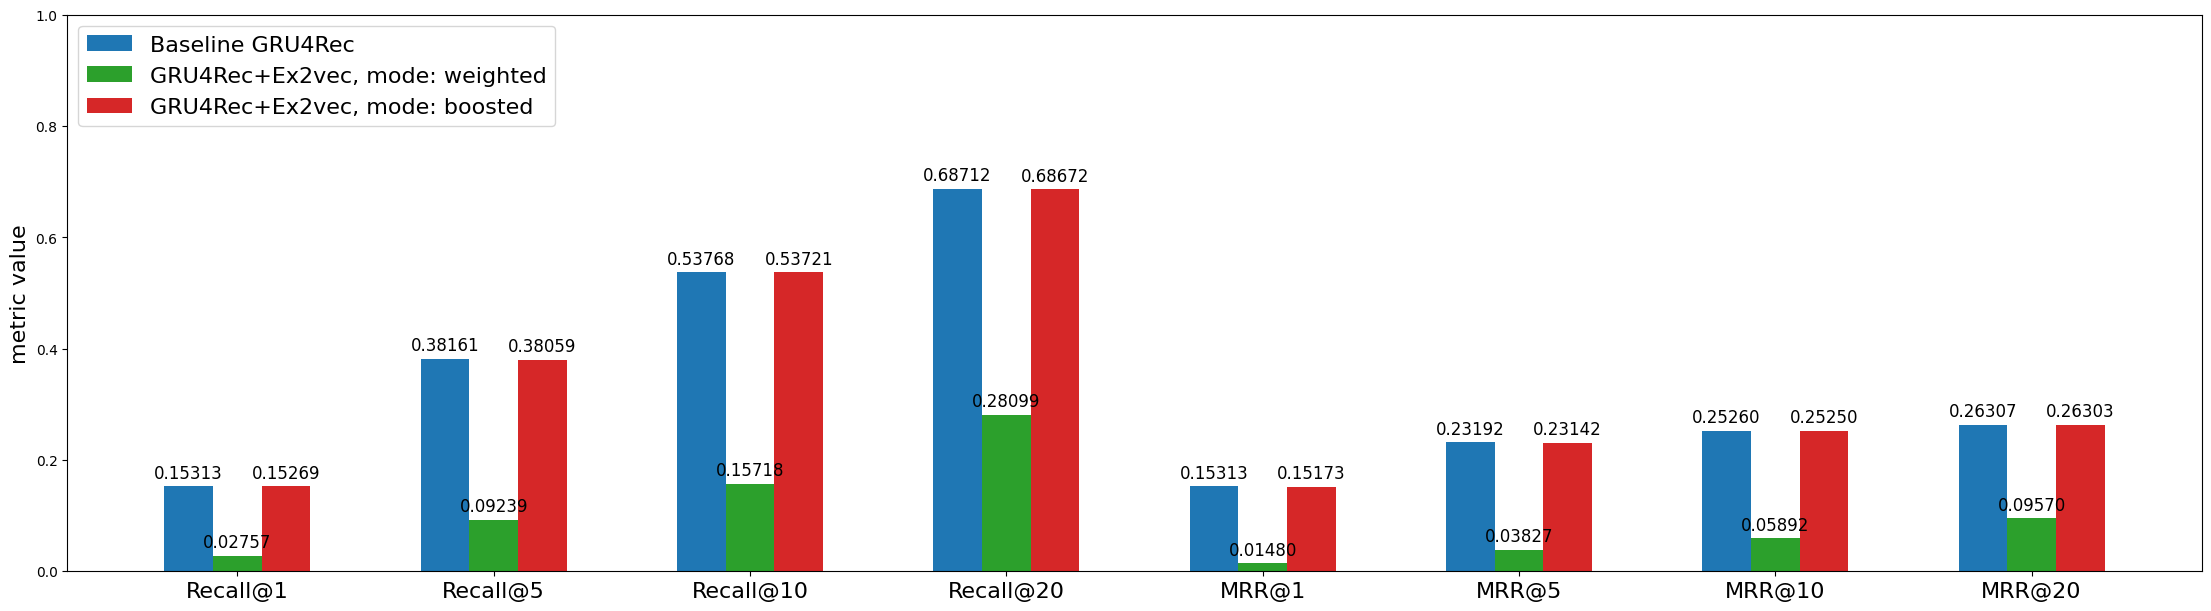

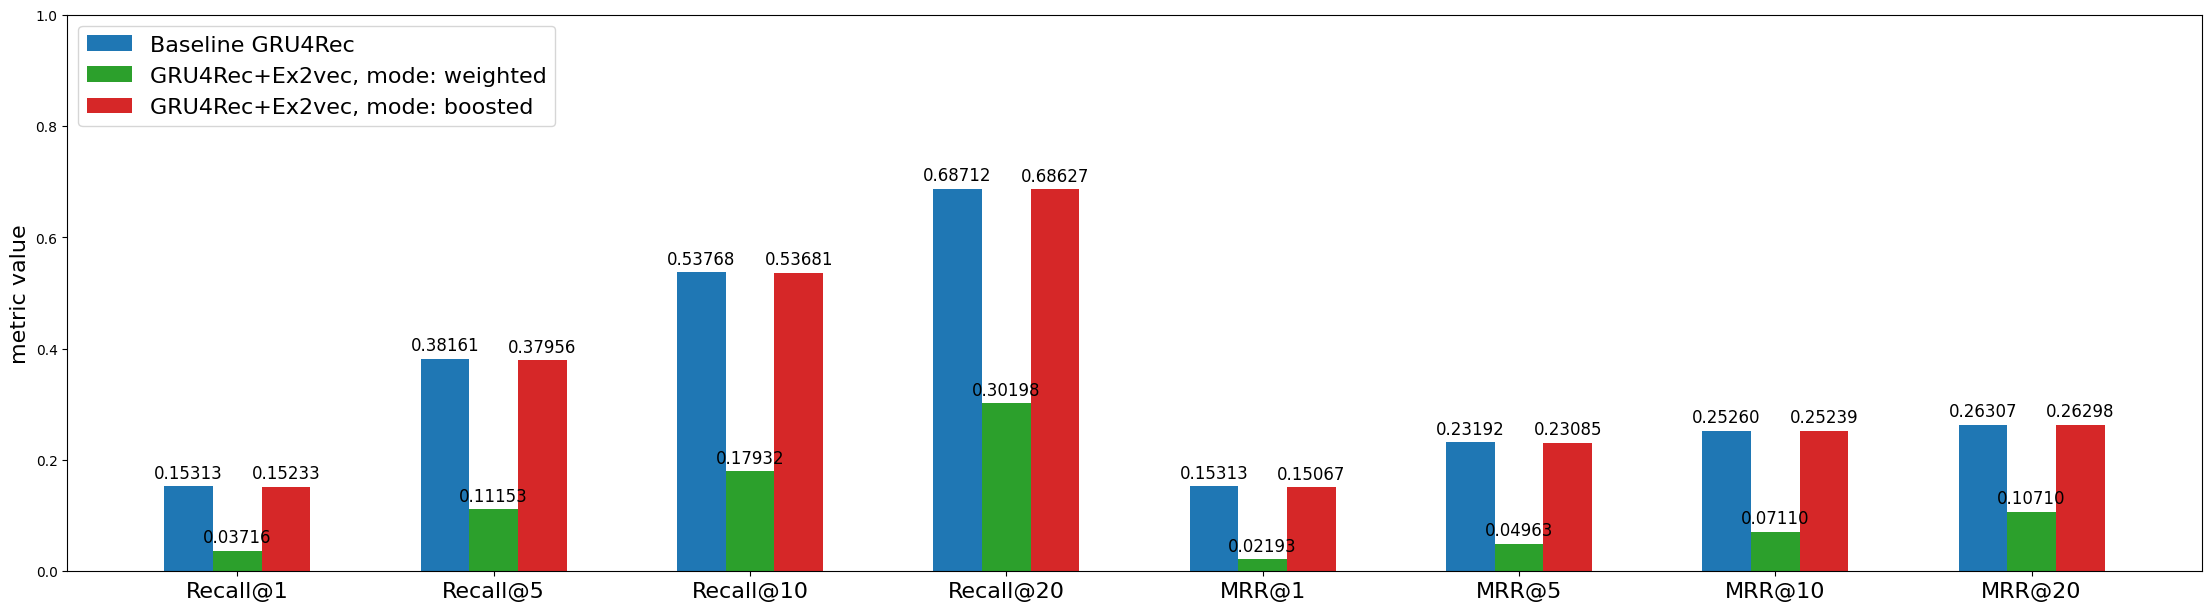

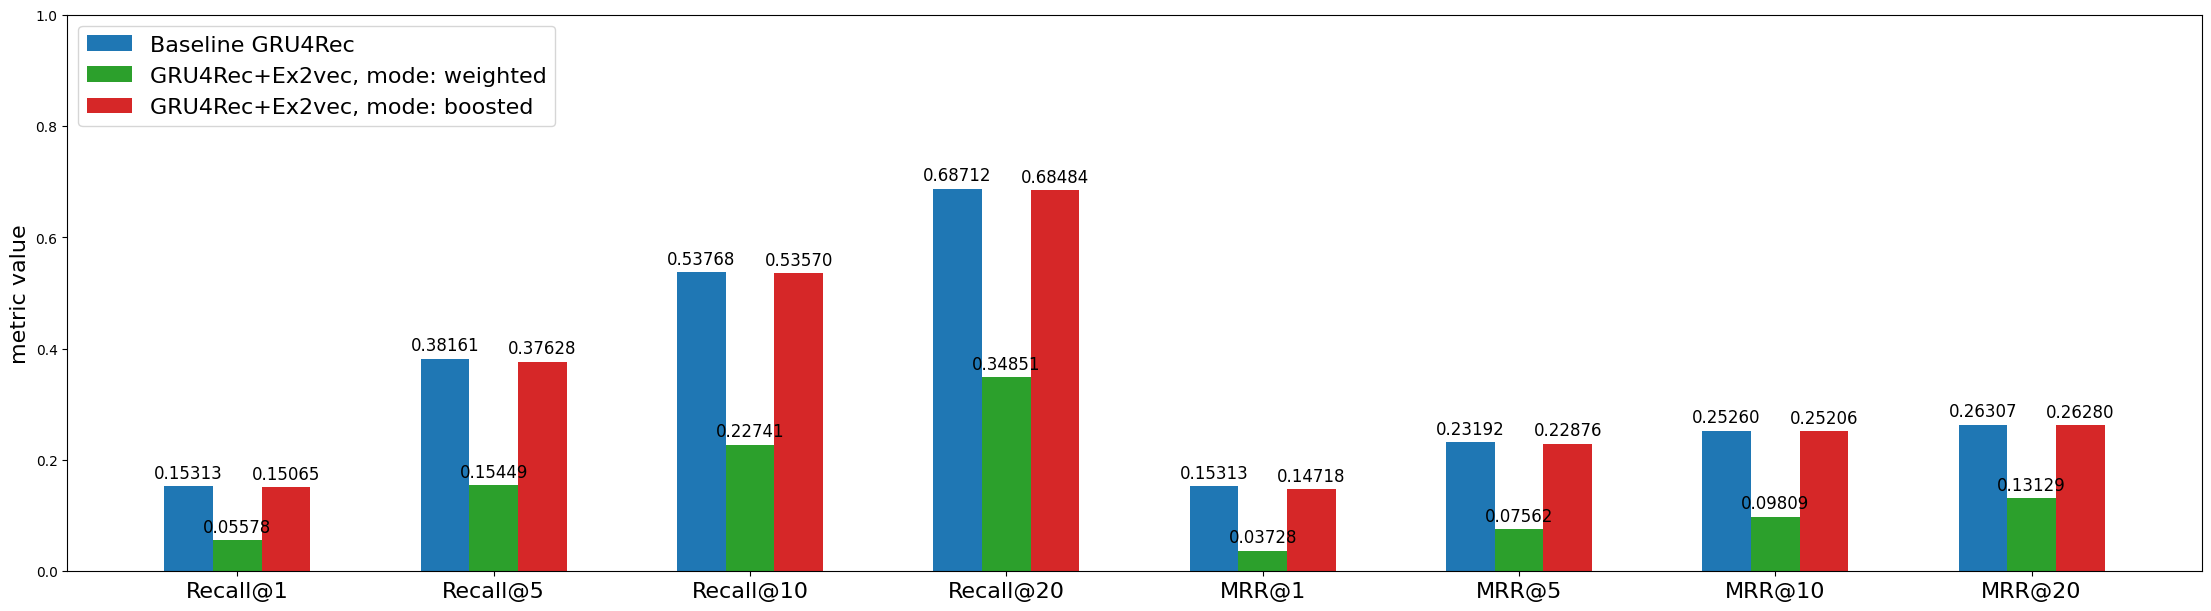

In [ ]:
cutoff = [1,5,10,20]
alpha_list = [0.03, 0.05, 0.1]
topk=100
color_map = {'weighted': 'tab:green', 'boosted': 'tab:red', }

# for each alpha, print the performance bar plots
for alpha in alpha_list:
    score_comb_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/score_combination_threshold.csv')

    # x axis values
    gru4rec_combi_metrics = tuple([f"Recall@{c}" for c in cutoff] + [f"MRR@{c}" for c in cutoff])
    x = np.arange(len(gru4rec_combi_metrics))

    # filter out rows of specific alpha
    gru4rec_rows = score_comb_df[
        (score_comb_df['alpha'] == alpha) &
        (score_comb_df['combination_mode'].isin(['boosted', 'weighted']))
    ]

    metrics_dict = {}
    bar_colors = []
    for recalls, mrrs, baseline_recalls, baseline_mrrs, combination_mode in zip(gru4rec_rows['recalls_comb'], gru4rec_rows['mrrs_comb'], gru4rec_rows['baseline_recalls'], gru4rec_rows['baseline_mrrs'], gru4rec_rows['combination_mode']):
        # split out values, e.g. Recall@1=0.2433,Recall@5=0.453,MRR@1=0.123,MRR@5=0.431
        baseline_recall_vals = [float(recall.split('=')[1]) for recall in baseline_recalls.split(',')]
        baseline_mrr_vals = [float(mrr.split('=')[1]) for mrr in baseline_mrrs.split(',')]
        metrics_before = baseline_recall_vals + baseline_mrr_vals

        recall_vals = [float(recall.split('=')[1]) for recall in recalls.split(',')]
        mrr_vals = [float(mrr.split('=')[1]) for mrr in mrrs.split(',')]
        metrics_after = recall_vals + mrr_vals

        # add all before and after metrics to dict as tuples
        metrics_dict["Baseline GRU4Rec"] = tuple(metrics_before)
        metrics_dict[f"GRU4Rec+Ex2vec, mode: {combination_mode}"] = tuple(metrics_after)
        bar_colors.append(color_map.get(combination_mode, None))

    width = 0.19
    multiplier = 0
    fig, ax = plt.subplots(figsize=(22, 6), layout='constrained')

    for (k, v), bar_color in zip(metrics_dict.items(), [None] + bar_colors):
        offset = width * multiplier
        rects = ax.bar(x + offset, v, width, label=k, color=bar_color)
        ax.bar_label(rects, labels=[f"{va:.5f}" for va in v], padding=3, fontsize=12)
        multiplier += 1

    ax.set_ylabel('metric value', fontsize=16)
    ax.set_xticks(x + width, gru4rec_combi_metrics, fontsize=16)
    ax.legend(loc='upper left', ncols=1, fontsize=16)
    ax.set_ylim(0, 1)

    plt.show()

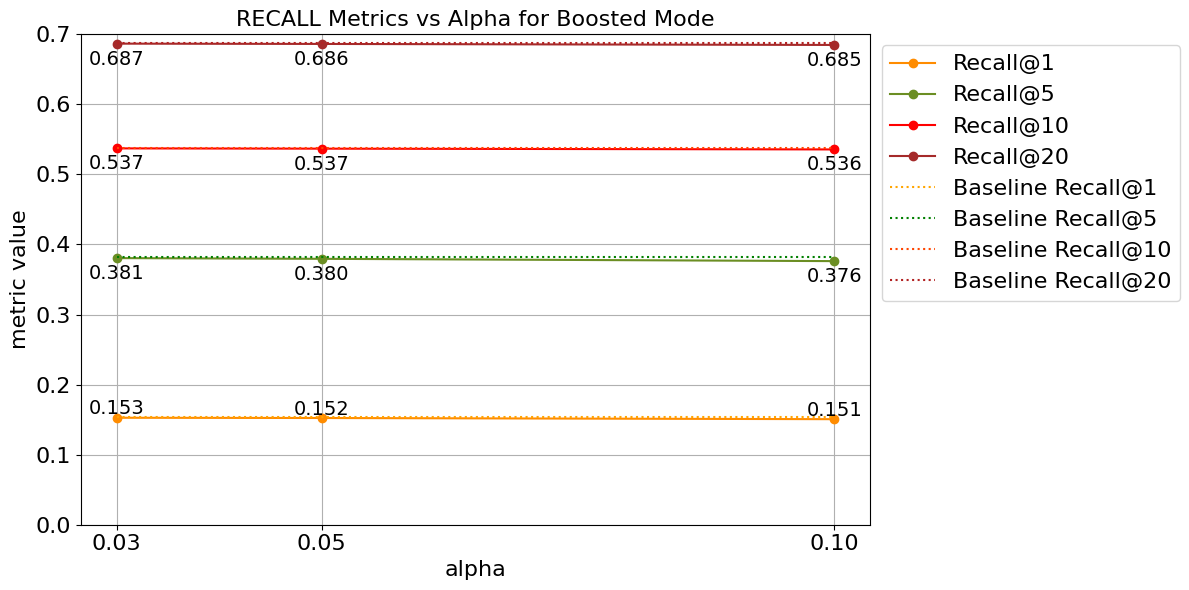

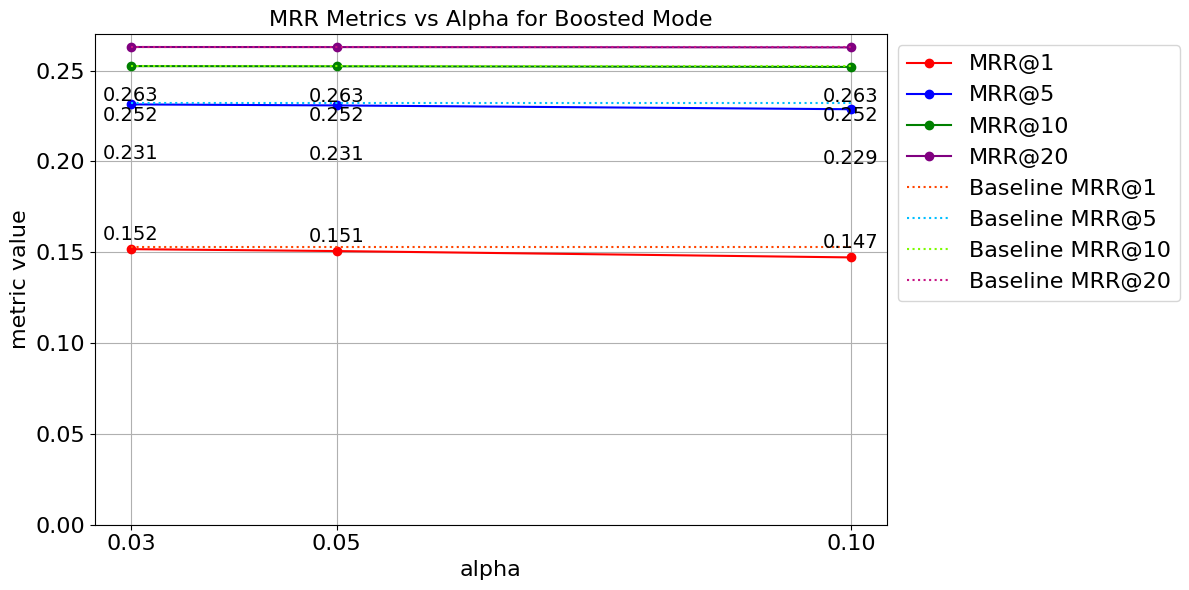

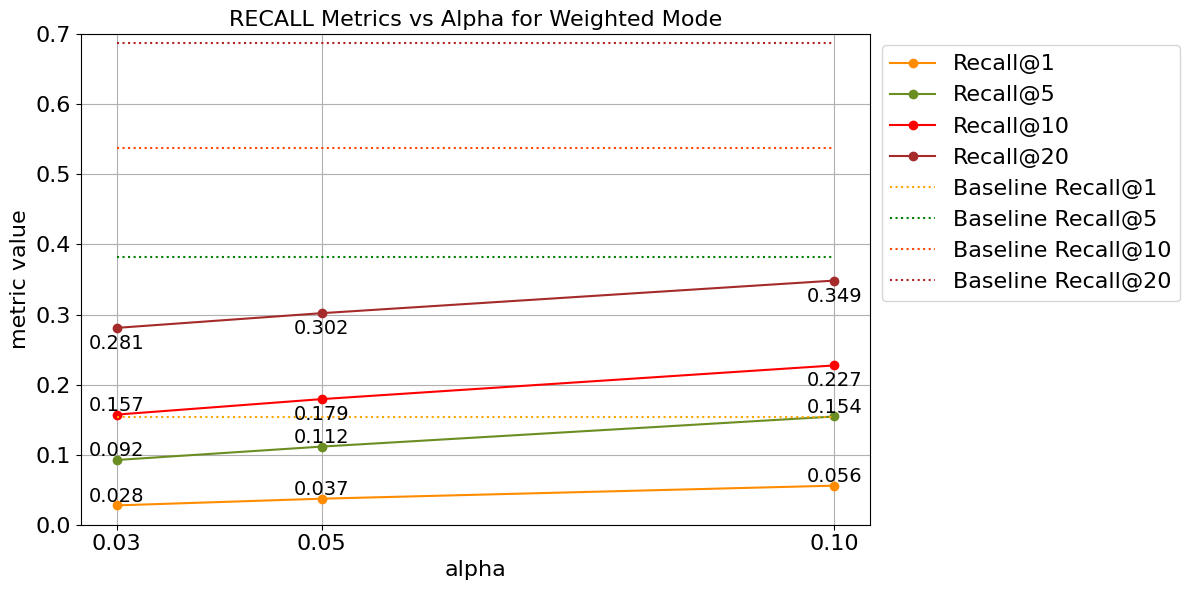

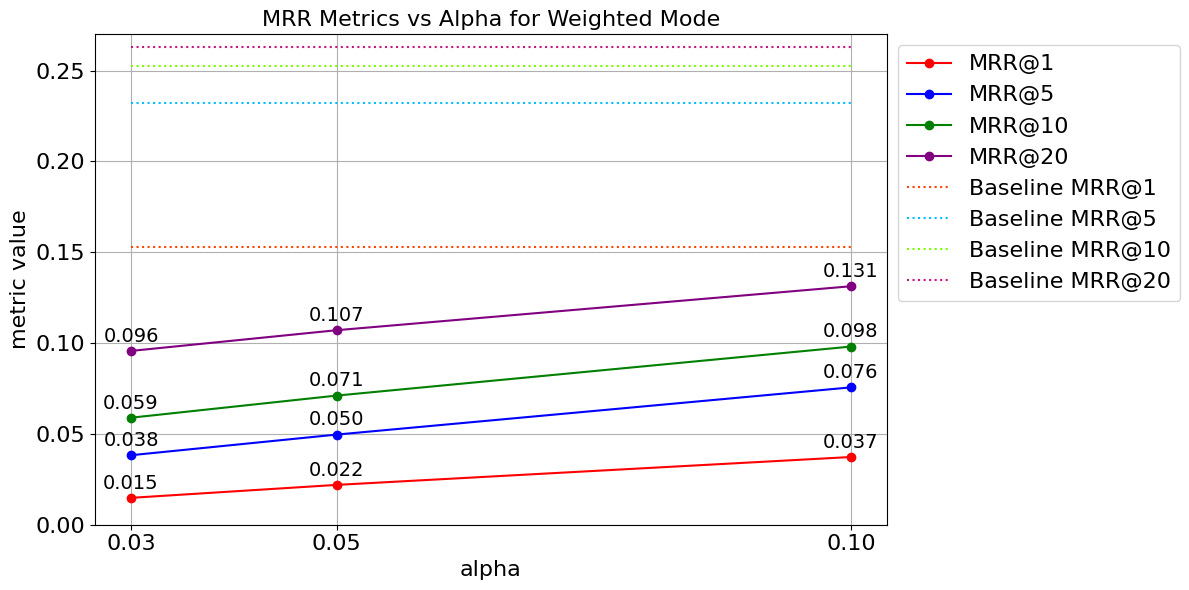

In [ ]:
score_comb_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/score_combination_threshold.csv')

cutoff = [1, 5, 10, 20]
recall_metrics = [f"Recall@{c}" for c in cutoff]
mrr_metrics = [f"MRR@{c}" for c in cutoff]
alpha_list = sorted(score_comb_df['alpha'].unique())

# filter data for "boosted" and "weighted" methods
filtered_df = score_comb_df[score_comb_df['combination_mode'].isin(['boosted', 'weighted'])]

# initialize a dictionary to store metric values for each mode
metrics_by_alpha = {
    mode: {
        'recall': {metric: [] for metric in recall_metrics},
        'mrr': {metric: [] for metric in mrr_metrics},
        'baseline_recall': {metric: [] for metric in recall_metrics},
        'baseline_mrr': {metric: [] for metric in mrr_metrics},
    }
    for mode in ['boosted', 'weighted']
}

for combination_mode in metrics_by_alpha.keys():
    for alpha in alpha_list:
        alpha_rows = filtered_df[(filtered_df['alpha'] == alpha) & (filtered_df['combination_mode'] == combination_mode)]
        if not alpha_rows.empty:
            recalls = [float(r.split('=')[1]) for r in alpha_rows['recalls_comb'].iloc[0].split(',')]
            mrrs = [float(m.split('=')[1]) for m in alpha_rows['mrrs_comb'].iloc[0].split(',')]

            baseline_recalls = [float(r.split('=')[1]) for r in alpha_rows['baseline_recalls'].iloc[0].split(',')]
            baseline_mrrs = [float(m.split('=')[1]) for m in alpha_rows['baseline_mrrs'].iloc[0].split(',')]

            for metric, value, baseline_value in zip(recall_metrics, recalls, baseline_recalls):
                metrics_by_alpha[combination_mode]['recall'][metric].append(value)
                metrics_by_alpha[combination_mode]['baseline_recall'][metric].append(baseline_value)
            for metric, value, baseline_value in zip(mrr_metrics, mrrs, baseline_mrrs):
                metrics_by_alpha[combination_mode]['mrr'][metric].append(value)
                metrics_by_alpha[combination_mode]['baseline_mrr'][metric].append(baseline_value)
        else:
            for metric in recall_metrics:
                metrics_by_alpha[combination_mode]['recall'][metric].append(None)  # Handle missing data
                metrics_by_alpha[combination_mode]['baseline_recall'][metric].append(None)  # Handle missing data
            for metric in mrr_metrics:
                metrics_by_alpha[combination_mode]['mrr'][metric].append(None)  # Handle missing data
                metrics_by_alpha[combination_mode]['baseline_mrr'][metric].append(None)  # Handle missing data


mrr_colors = ['red', 'blue', 'green', 'purple']
recall_colors = ['darkorange', 'olivedrab', 'red', 'brown']

# define a different, more muted color palette for baseline recall and baseline MRR
baseline_recall_colors = ['orange', 'green', 'orangered', 'firebrick']
baseline_mrr_colors = ['orangered', 'deepskyblue', 'lawngreen', 'mediumvioletred']


for combination_mode, metric_groups in metrics_by_alpha.items():
    for metric_type, metric_values in metric_groups.items():
        if 'baseline' in metric_type:
            continue # skip separate plotting

        plt.figure(figsize=(12, 6))
        color_counter = 0

        for metric, values in metric_values.items():
            if metric_type == 'mrr':
                line_color = mrr_colors[color_counter % len(mrr_colors)]
                color_counter += 1
            elif metric_type == 'recall':
                line_color = recall_colors[color_counter % len(recall_colors)]
                color_counter += 1
            else:
                line_color = None

            plt.plot(
                alpha_list,
                values,
                label=metric,
                marker='o',
                color=line_color
            )

            for x, y in zip(alpha_list, values):
                if y is not None:  # avoid annotating missing data
                  if y <= 0.16:
                    plt.text(x, y+0.005, f"{y:.3f}", ha='center', fontsize=14, color='black')
                  else:
                    plt.text(x, y-0.03, f"{y:.3f}", ha='center', fontsize=14, color='black')

        baseline_metric_values = metrics_by_alpha[combination_mode][f'baseline_{metric_type}']
        if metric_type == 'mrr':  # for MRR metrics, use muted baseline MRR colors
            baseline_colors = baseline_mrr_colors
        elif metric_type == 'recall':  # for recall metrics use muted baseline recall colors
            baseline_colors = baseline_recall_colors

        for idx, (metric, baseline_values) in enumerate(baseline_metric_values.items()):
            plt.plot(
                alpha_list,
                baseline_values,
                label=f"Baseline {metric}",
                linestyle='dotted',
                color=baseline_colors[idx % len(baseline_colors)]
            )

        plt.title(f'{metric_type.upper()} Metrics vs Alpha for {combination_mode.capitalize()} Mode', fontsize=16)
        plt.xlabel('alpha', fontsize=16)
        plt.ylabel('metric value', fontsize=16)

        if metric_type == 'recall':
            plt.ylim(0, 0.7)
        elif metric_type == 'mrr':
            plt.ylim(0, 0.27)

        plt.xticks(alpha_list, fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(True)
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=16)
        plt.tight_layout()
        plt.show()


# Combiniation Idea 2: Using GRU4Rec's pre-trained item embeddings during Ex2Vec training

In [ ]:
# train Ex2Vec (with GRU embeddings) with best parameters found through hyperparameter optim
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/train.py -pf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_ex2vec.json -t N -n ex2vec_gruembds_finaltrain -ud 1 -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ -ep /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_FULL_finaltrain_bestparams_trial19.pt --use_cuda

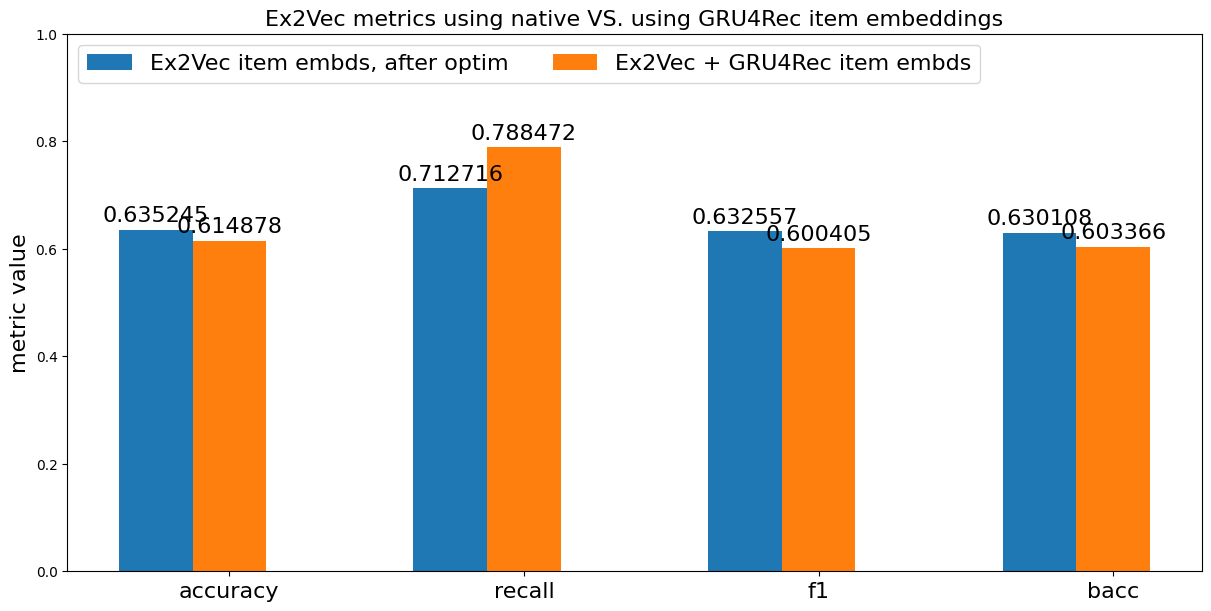

In [ ]:
# load all trained model information
trained_models_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/best_models.csv')

# extract metrics from ex2vec without VS with gru4rec embds
ex2vec_rows = trained_models_df[trained_models_df['model_name'].str.contains('ex2vec_baseline_FULL_finaltrain__BS512LR0.00014455048679195258L_DIM64N_EP50|ex2vec_gruembds_FULL_finaltrain_trial19_bestparams__BS512LR0.00014455048679195258L_DIM64N_EP50')]

before_after_lists = []
for metric_str in ex2vec_rows['results']: # acc=0.64, recall=0.85, f1=0.62, bacc=0.64
    metrics_list = metric_str.split(', ') # [acc=0.64, recall=0.85, f1=0.62, bacc=0.64]
    metrics_values = [float(metric.split('=')[1]) for metric in metrics_list] # [0.64, 0.85, 0.62, 0.64]
    before_after_lists.append(metrics_values)

metrics = ('accuracy', 'recall', 'f1', 'bacc')
metric_dict = {
    'Ex2Vec item embds, after optim': tuple(before_after_lists[0]),
    'Ex2Vec + GRU4Rec item embds': tuple(before_after_lists[1]),
}

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for k,v in metric_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k)
    ax.bar_label(rects, padding=3, fontsize=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('metric value', fontsize=16)
ax.set_title('Ex2Vec metrics using native VS. using GRU4Rec item embeddings', fontsize=16)
ax.set_xticks(x + width, metrics, fontsize=16)
ax.legend(loc='upper left', ncols=2, fontsize=16)
ax.set_ylim(0, 1)

plt.show()

## Combination Idea 3: Training GRU4Rec with Ex2Vec as regularization

In [ ]:
# retrain gru4rec with best params
gru4rec_best_param_str = convert_to_param_str('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_gru4rec_DEL.json')
combination_mode = 'boosted'
cutoffs = '1 5 10 20'
alpha_list = '0.2'

command = f'python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/run.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_combined.csv -ps {gru4rec_best_param_str} -t /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_test.csv -s /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_bestparams_ex2vecreg_DEL.pt -m {cutoffs} -a {alpha_list} -ik "itemId" -tk "timestamp" -pm recall -lpm -c {combination_mode} -ex /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/ex2vec_baseline_finaltrain_DEL__BS512LR0.0003208416119525183L_DIM64N_EP30_Epoch29_f10.2947.pt'
get_ipython().system(command)

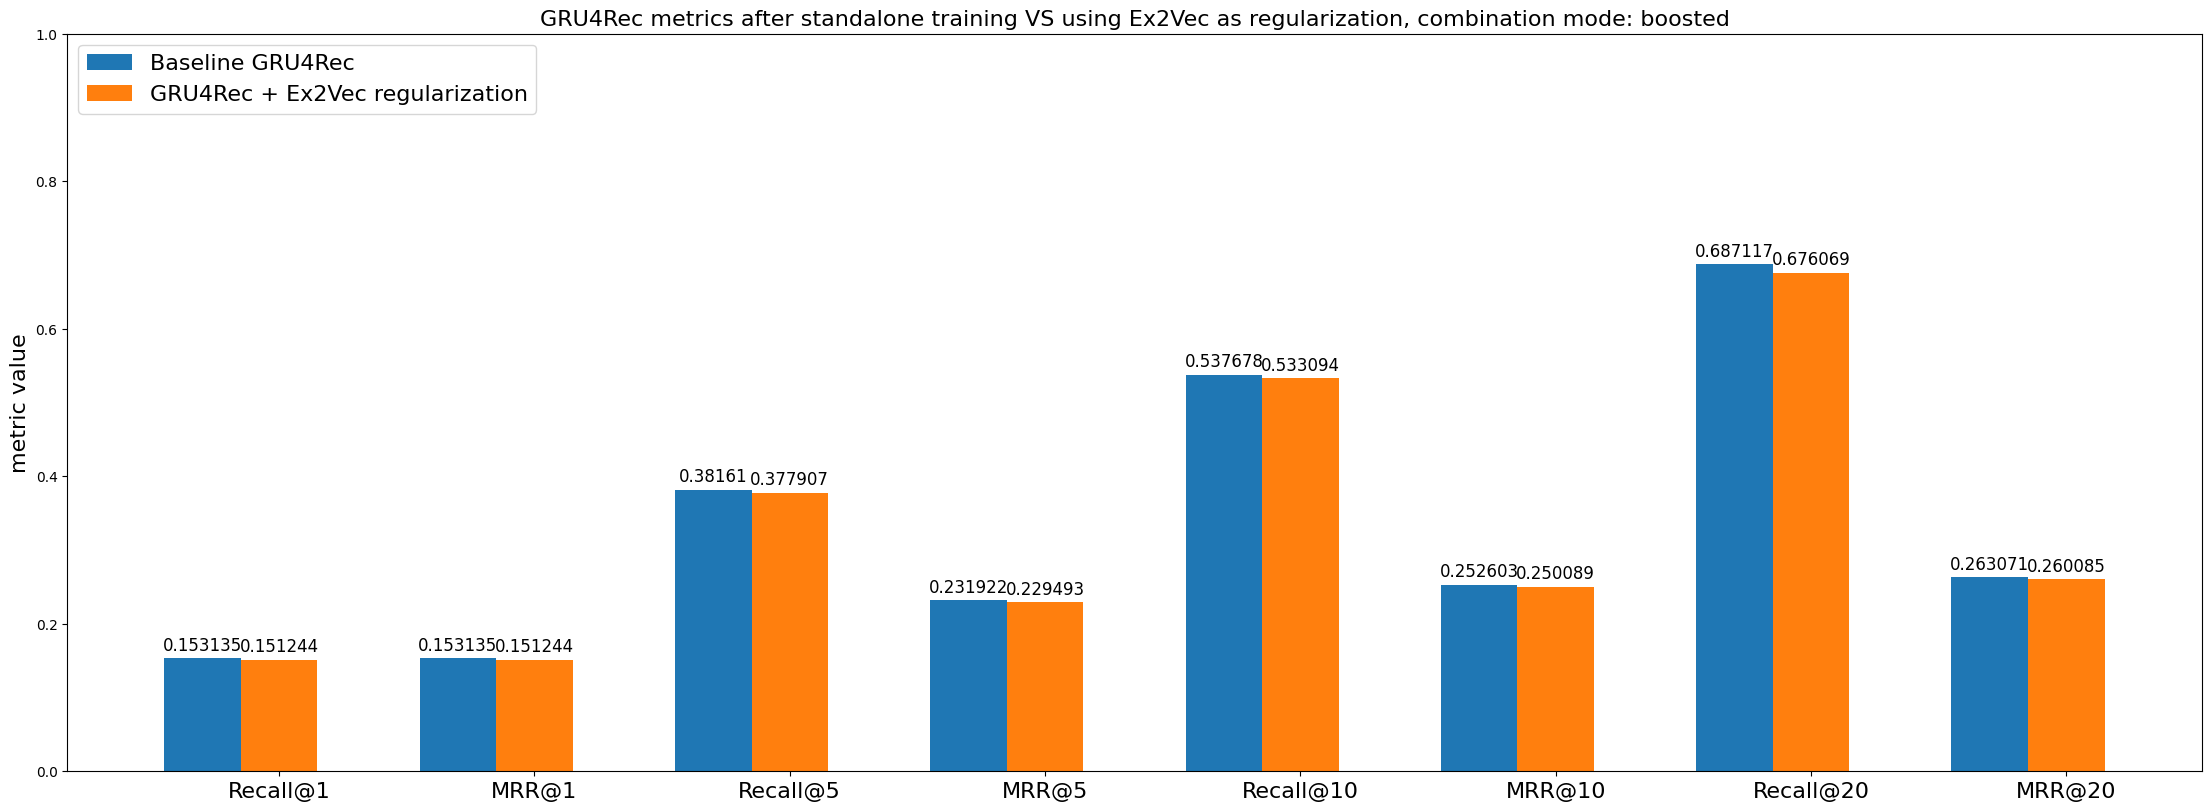

In [ ]:
combination_mode = 'boosted'
cutoffs = '1 5 10 20'
alpha_list = '0.2'
# load all trained model information
best_models_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/best_models.csv')

# extract metrics from gru4rec VS gru4rec + ex2vec regularization
gru4rec_rows = best_models_df[best_models_df['model_name'].str.contains('GRU4Rec_FULL_finaltrain_bestparams_trial19|GRU4Rec_FULL_finaltrain_bestparams_trial19_ex2vec_comb3_sigmoid')]

before_after_lists = []
for metric_str in gru4rec_rows['results']: # recall@1=0.2396088019559902, mrr@1=0.2396088019559902, ...
    metrics_list = metric_str.split(', ') # [recall@1=0.2396088019559902, mrr@1=0.2396088019559902,...]
    metrics_values = [float(metric.split('=')[1]) for metric in metrics_list] # [0.2396088019559902, 0.2396088019559902, ...]
    before_after_lists.append(metrics_values)

metrics = ('Recall@1', 'MRR@1', 'Recall@5', 'MRR@5', 'Recall@10', 'MRR@10', 'Recall@20', 'MRR@20')
metric_dict = {
    'Baseline GRU4Rec': tuple(before_after_lists[0]),
    'GRU4Rec + Ex2Vec regularization': tuple(before_after_lists[1]),
}

x = np.arange(len(metrics))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(22,8), layout='constrained')

for k,v in metric_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k)
    ax.bar_label(rects, padding=3, fontsize=12)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('metric value', fontsize=16)
ax.set_title(f'GRU4Rec metrics after standalone training VS using Ex2Vec as regularization, combination mode: {combination_mode}', fontsize=16)
ax.set_xticks(x + width, metrics, fontsize=16)
ax.legend(loc='upper left', ncols=1, fontsize=16)
ax.set_ylim(0, 1)

plt.show()